In [2]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

In [6]:
# 0: camera viewpoint
# 1: world viewpoint
# 2: new canonical model

strategy=2

if strategy==0:
    #CAM VIEWPOINT

    datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"
    iter_interest=0

    d_xyz=np.load(os.path.join(datapath,"d_xyz_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bxnb_gaussx3
    fid=np.load(os.path.join(datapath,"fid_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bx1
    means3D=np.load(os.path.join(datapath,"means3D_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bxnb_gaussx3

    print(d_xyz.shape)
    print(fid.shape)
    print(means3D.shape)


    d_xyz=d_xyz.reshape(1,-1,3)
    means3D=means3D.reshape(1,-1,3)

elif strategy==2:
    # NEW CANONICAL SPACE

    #datapath="/cluster/project/hilliges/mbressieux/log/plate_novel_view"
    datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"


    d_xyz=np.load(os.path.join(datapath,"can_d_xyz.npy")) #size Bxnb_gaussx3
    d_scaling=np.load(os.path.join(datapath,"can_d_scaling.npy")) #size Bx1

    print(d_xyz.shape)

elif strategy==1:
    datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"
    iter_interest=5001

    d_xyz=np.load(os.path.join(datapath,"d_xyz_"+str(iter_interest)+".npy")) #size Bxnb_gaussx3
    fid=np.load(os.path.join(datapath,"fid_"+str(iter_interest)+".npy")) #size Bx1
    means3D=np.load(os.path.join(datapath,"means3D_"+str(iter_interest)+".npy")) #size Bxnb_gaussx3

    print(d_xyz.shape)
    print(fid.shape)
    print(means3D.shape)

    ordered_idx=np.argsort(fid,axis=0)
    fid=fid[ordered_idx]
    d_xyz=d_xyz[ordered_idx]
    means3D=means3D[ordered_idx]

    d_xyz=d_xyz.reshape(d_xyz.shape[0],-1,3)
    means3D=means3D.reshape(d_xyz.shape[0],-1,3)


(807, 125499, 3)


Shape of the displacement data: (125499, 3)


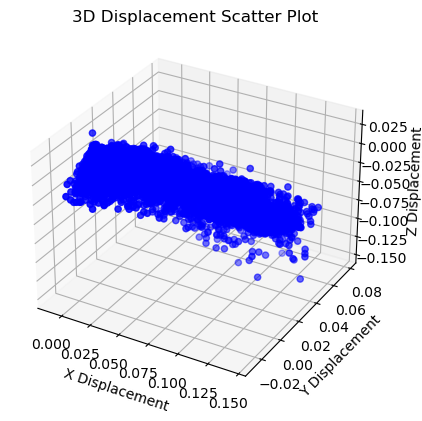

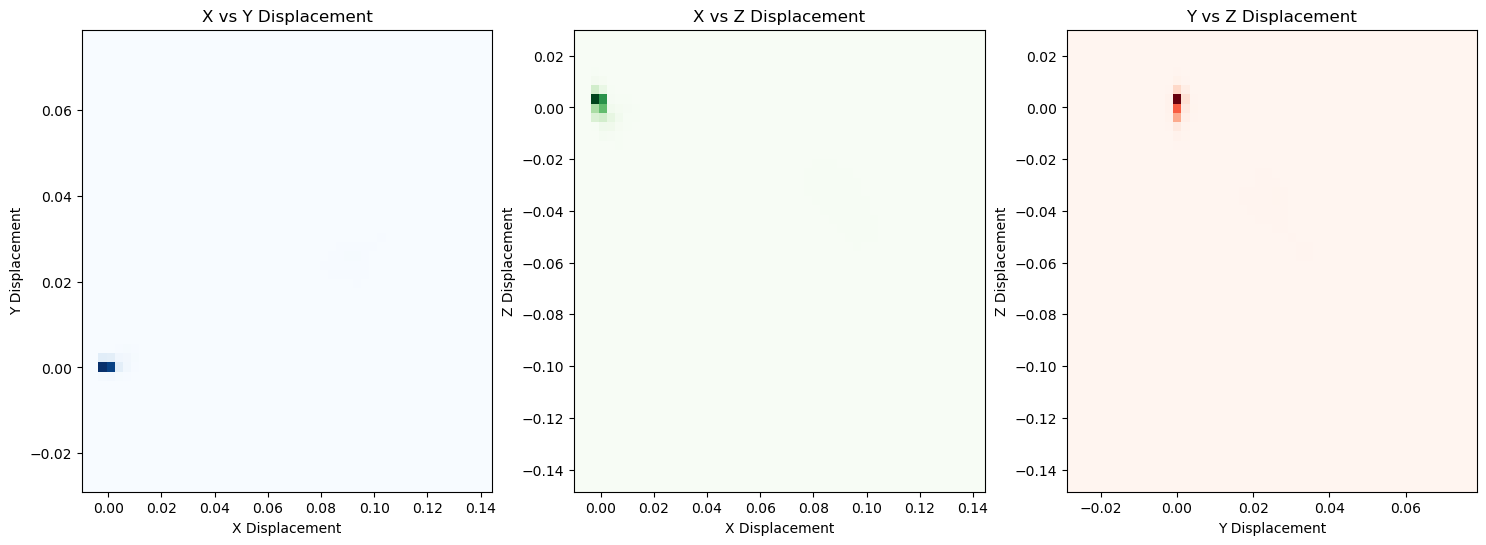

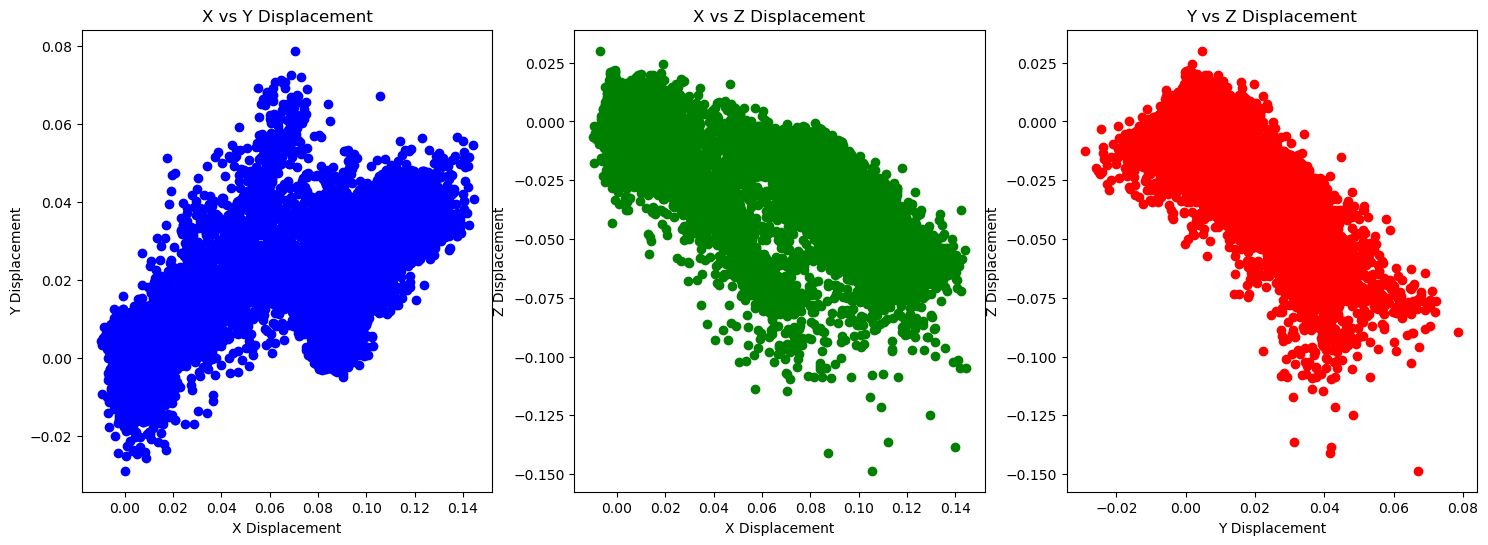

In [44]:


# Load the displacement data
#displacement_data = np.load('displacement.npy')
displacement_data = d_xyz[200]

# Check the shape of the loaded data to ensure it's correct
print("Shape of the displacement data:", displacement_data.shape)

# Extract X, Y, Z displacements
X_displacement = displacement_data[:, 0]
Y_displacement = displacement_data[:, 1]
Z_displacement = displacement_data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_displacement, Y_displacement, Z_displacement, c='b', marker='o')

ax.set_title('3D Displacement Scatter Plot')
ax.set_xlabel('X Displacement')
ax.set_ylabel('Y Displacement')
ax.set_zlabel('Z Displacement')

plt.show()

# Create 2D histograms to analyze distribution of displacements in pairs of dimensions
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X vs Y displacement
axs[0].hist2d(X_displacement, Y_displacement, bins=50, cmap='Blues')
axs[0].set_title('X vs Y Displacement')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Y Displacement')

# X vs Z displacement
axs[1].hist2d(X_displacement, Z_displacement, bins=50, cmap='Greens')
axs[1].set_title('X vs Z Displacement')
axs[1].set_xlabel('X Displacement')
axs[1].set_ylabel('Z Displacement')

# Y vs Z displacement
axs[2].hist2d(Y_displacement, Z_displacement, bins=50, cmap='Reds')
axs[2].set_title('Y vs Z Displacement')
axs[2].set_xlabel('Y Displacement')
axs[2].set_ylabel('Z Displacement')

plt.show()


#Show 3 2D scatterplot

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X vs Y displacement
axs[0].scatter(X_displacement, Y_displacement, c='b', marker='o')
axs[0].set_title('X vs Y Displacement')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Y Displacement')

# X vs Z displacement
axs[1].scatter(X_displacement, Z_displacement, c='g', marker='o')
axs[1].set_title('X vs Z Displacement')
axs[1].set_xlabel('X Displacement')
axs[1].set_ylabel('Z Displacement')

# Y vs Z displacement
axs[2].scatter(Y_displacement, Z_displacement, c='r', marker='o')
axs[2].set_title('Y vs Z Displacement')
axs[2].set_xlabel('Y Displacement')
axs[2].set_ylabel('Z Displacement')



plt.show()


In [45]:
# get some general statistics
print("X Displacement Statistics:")
print("Mean:", np.mean(X_displacement))
print("Median:", np.median(X_displacement))
print("Standard Deviation:", np.std(X_displacement))
print("Min:", np.min(X_displacement))
print("Max:", np.max(X_displacement))

print("\nY Displacement Statistics:")
print("Mean:", np.mean(Y_displacement))
print("Median:", np.median(Y_displacement))
print("Standard Deviation:", np.std(Y_displacement))
print("Min:", np.min(Y_displacement))
print("Max:", np.max(Y_displacement))

print("\nZ Displacement Statistics:")
print("Mean:", np.mean(Z_displacement))
print("Median:", np.median(Z_displacement))
print("Standard Deviation:", np.std(Z_displacement))
print("Min:", np.min(Z_displacement))
print("Max:", np.max(Z_displacement))




X Displacement Statistics:
Mean: 0.01395897
Median: -0.00036933646
Standard Deviation: 0.033265337
Min: -0.009912115
Max: 0.14437327

Y Displacement Statistics:
Mean: 0.0042597656
Median: 0.0005561579
Standard Deviation: 0.009586887
Min: -0.028961584
Max: 0.078676626

Z Displacement Statistics:
Mean: -0.00526672
Median: 0.0011564493
Standard Deviation: 0.016419033
Min: -0.14857489
Max: 0.030066818


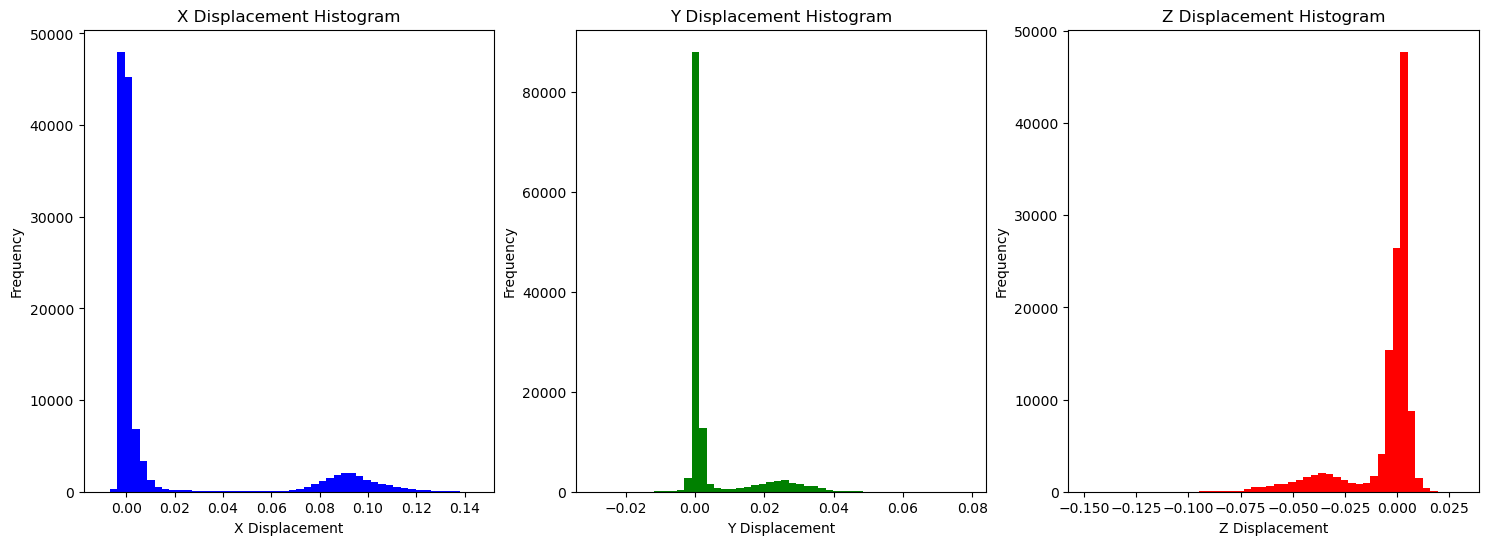

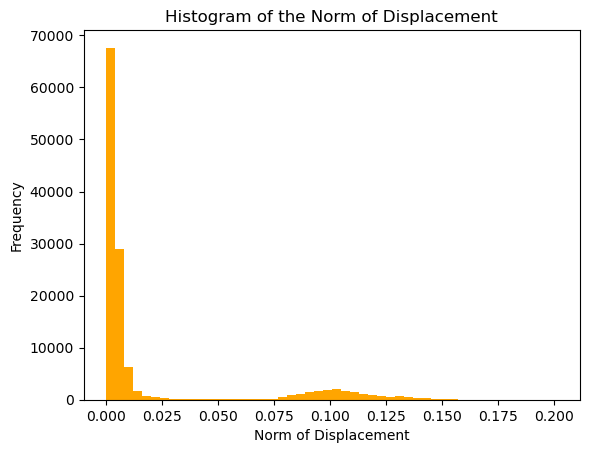

In [46]:
#get histogram of the displacement along each axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X Displacement
axs[0].hist(X_displacement, bins=50, color='b')
axs[0].set_title('X Displacement Histogram')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Frequency')

# Y Displacement
axs[1].hist(Y_displacement, bins=50, color='g')
axs[1].set_title('Y Displacement Histogram')
axs[1].set_xlabel('Y Displacement')
axs[1].set_ylabel('Frequency')

# Z Displacement
axs[2].hist(Z_displacement, bins=50, color='r')
axs[2].set_title('Z Displacement Histogram')
axs[2].set_xlabel('Z Displacement')
axs[2].set_ylabel('Frequency')

plt.show()


norm_displacement = np.sqrt(X_displacement**2 + Y_displacement**2 + Z_displacement**2)

#get histogram of the norm of the displacement
fig, ax = plt.subplots()
ax.hist(norm_displacement, bins=50, color='orange')
ax.set_title('Histogram of the Norm of Displacement')
ax.set_xlabel('Norm of Displacement')
ax.set_ylabel('Frequency')
plt.show()


Number of clusters: 5


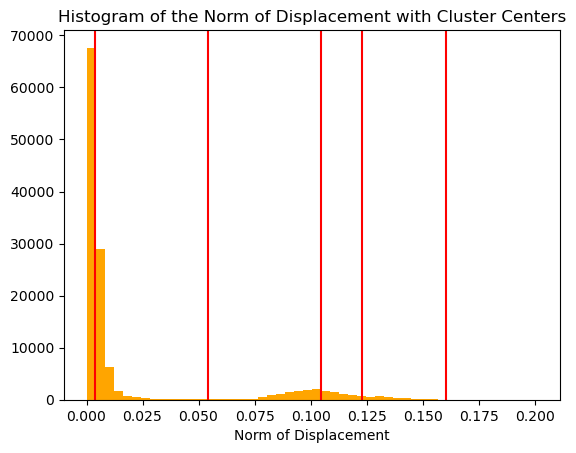

In [51]:
#divide d_norm in groups using meanshift clustering
from sklearn.cluster import MeanShift
import torch

#norm_displacement = torch.tensor(norm_displacement).float()

# Reshape the data to fit the clustering algorithm
#take a randowm sample of 1000 points
np.random.seed(0)
sample_idx = np.random.choice(norm_displacement.shape[0], 1000, replace=False)
X=norm_displacement[sample_idx].reshape(-1, 1)

# Create a MeanShift object and fit it to the data
ms = MeanShift(bandwidth=0.01)
ms.fit(X)

# Get the labels and cluster centers for all points in norm_displacement
labels = ms.labels_
cluster_centers = ms.cluster_centers_


# Get the number of clusters
n_clusters = len(cluster_centers)

# Print the number of clusters
print("Number of clusters:", n_clusters)

# Plot the histogram of the norm of displacement with the cluster centers
fig, ax = plt.subplots()
ax.hist(norm_displacement, bins=50, color='orange')
ax.set_title('Histogram of the Norm of Displacement with Cluster Centers')
ax.set_xlabel('Norm of Displacement')

# Plot the cluster centers
for center in cluster_centers:
    ax.axvline(center, color='r')

plt.show()


In [52]:
cluster_centers

array([[0.00387456],
       [0.10483602],
       [0.12314048],
       [0.05400414],
       [0.16038352]], dtype=float32)

In [37]:
X.shape

torch.Size([10000, 1])

0.14842349341429015


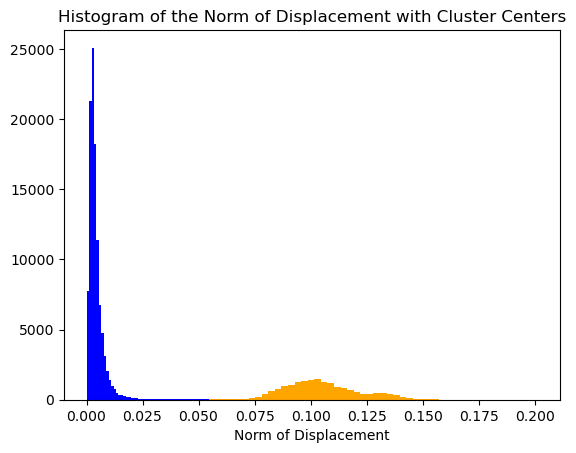

In [31]:
L=ms.predict(norm_displacement.reshape(-1,1))
print(L.sum()/len(L))

# Plot the histogram of the norm of displacement with the cluster centers
fig, ax = plt.subplots()
ax.hist(norm_displacement[L==1], bins=50, color='orange')
ax.hist(norm_displacement[L==0], bins=50, color='blue')
ax.set_title('Histogram of the Norm of Displacement with Cluster Centers')
ax.set_xlabel('Norm of Displacement')

plt.show()

In [32]:
can_d_scaling

(125499,)

In [17]:
X

array([[0.00500664],
       [0.00343829],
       [0.00170392],
       ...,
       [0.12073493],
       [0.11493429],
       [0.12233431]], dtype=float32)

In [39]:
#plot 3D scatter plot of the means3D
means3D_data = means3D[0]

# Check the shape of the loaded data to ensure it's correct
print("Shape of the means3D data:", means3D_data.shape)

# Extract X, Y, Z displacements
X_means3D = means3D_data[:, 0]
Y_means3D = means3D_data[:, 1]
Z_means3D = means3D_data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_means3D, Y_means3D, Z_means3D, c='b', marker='o')

ax.set_title('3D Position Scatter Plot')
ax.set_xlabel('X Means3D')
ax.set_ylabel('Y Means3D')
ax.set_zlabel('Z Means3D')

plt.show()

NameError: name 'means3D' is not defined